In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from math import sqrt, fabs

In [0]:
class Map():
  def __init__(self):
    self.map=[[0 for i in range(8)]for j in range (8)]
    self.goat,self.dog1,self.dog2=self.generate_target()
    if self.dog1[1]<self.dog2[1]:
      self.dog1,self.dog2=self.dog2,self.dog1
    #self.print_map()

  def generate_target(self):
    rand_len1,rand_wid1=random.randint(0,7),random.randint(0,7)
    rand_len2,rand_wid2=random.randint(0,7),random.randint(0,7)
    while rand_len2==rand_len1 and rand_wid2==rand_wid1:
      rand_len2,rand_wid2=random.randint(0,7),random.randint(0,7)
    rand_len3,rand_wid3=random.randint(0,7),random.randint(0,7)
    while (rand_len3==rand_len1 and rand_wid3==rand_wid1) or (rand_len3==rand_len1 and rand_wid3==rand_wid1) :
      rand_len3,rand_wid=random.randint(0,7),random.randint(0,7)
    return [rand_len1,rand_wid1],[rand_len2,rand_wid2],[rand_len3,rand_wid3]
    
  def get_target(self):
    return self.target

  def print_map(self):
    b = [['-'for i in range(8)] for j in range(8)]
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    for i in range(8):
      for j in range(8):
            if(self.goat ==[i,j]):
              b[i][j] = 'G'
            elif(self.dog1 == [i,j]):
              b[i][j] ='D'
            elif(self.dog2 == [i,j]):
              b[i][j] ='D'
    the_table = ax.table(cellText = b, colWidths = [0.04 for x in range(50)])
    plt.show()

  def get_map(self):
    return self.map

  def predict_move_goat(self):
    pos_x,pos_y=self.goat[0],self.goat[1]
    action_list=[]
    action=[]

#Prepare prediction for all the possible state

    if pos_x-1>=0:
      action_list.append([pos_x-1,pos_y])
    if pos_x+1<8:
      action_list.append([pos_x+1,pos_y])
    if pos_y-1>=0:
      action_list.append([pos_x,pos_y-1])
    if pos_y+1<8:
      action_list.append([pos_x,pos_y+1])
    for act in action_list:
      #print(act,self.dog1,self.dog2)
      if act!=self.dog1 and act!=self.dog2:
        action.append(act)
    #print(action)
    #self.goat=action[random.randint(0,len(action)-1)]
    return action

  def move_goat(self):
    action=self.predict_move_goat()
    #print(action)
    if not action:
      return False
    self.goat=action[random.randint(0,len(action)-1)]
    return True

  def move_dog1(self,w):
    pos_x,pos_y=self.dog1[0],self.dog1[1]
    action_list=[]
    action=[]
    action.append([pos_x,pos_y])
    if pos_x-1>=0:
      action_list.append([pos_x-1,pos_y])
    if pos_x+1<8:
      action_list.append([pos_x+1,pos_y])
    if pos_y-1>=0:
      action_list.append([pos_x,pos_y-1])
    if pos_y+1<8:
      action_list.append([pos_x,pos_y+1])
    for act in action_list:
      #print(act,self.dog1,self.dog2)
      if act!=self.goat and act!=self.dog2:
        action.append(act)
    goat_action=self.predict_move_goat()
    #print(action)
    #print(goat_action)
    move,distance,counter=0,0,0
    min_distance=float('inf')
    for j in action:
      for i in goat_action:
        distance+=self.get_mahttan_dist([i[0],i[1]+1],j)
      if w>50:
        distance+=(4*self.get_mahttan_dist(self.dog2,self.goat))
      #distance+=self.get_mahttan_dist(self.dog1,self.goat)
      if distance<min_distance:
        min_distance=distance
        move=counter
      distance=0
      counter+=1
      #print(counter,min_distance,distance)
    #print(move)
    self.dog1=action[move]

  def move_dog2(self,w):
    pos_x,pos_y=self.dog2[0],self.dog2[1]
    action_list=[]
    action=[]
    action.append([pos_x,pos_y])
    if pos_x-1>=0:
      action_list.append([pos_x-1,pos_y])
    if pos_x+1<8:
      action_list.append([pos_x+1,pos_y])
    if pos_y-1>=0:
      action_list.append([pos_x,pos_y-1])
    if pos_y+1<8:
      action_list.append([pos_x,pos_y+1])
    for act in action_list:
      #print(act,self.dog1,self.dog2)
      if act!=self.goat and act!=self.dog1:
        action.append(act)
    goat_action=self.predict_move_goat()
    # print(action)
    # print(goat_action)
    move,distance,counter=0,0,0
    min_distance=float('inf')
    for j in action:
      for i in goat_action:
        distance+=self.get_mahttan_dist([i[0]+1,i[1]],j)
      if w>50:
        distance+=(4*self.get_mahttan_dist(self.dog2,self.goat))
      if distance<min_distance:
        min_distance=distance
        move=counter
      distance=0
      counter+=1
      #print(counter,min_distance,distance)
    #print(move)
    self.dog2=action[move]

  def get_mahttan_dist(self,p1,p2):
    return fabs(p1[0]-p2[0])+fabs(p1[1]-p2[1])
  

  def endf(self):
    if self.goat==[0,0] and (self.dog1==[0,1] or self.dog1==[1,0]) and (self.dog2==[0,1] or self.dog2==[1,0]):
      return True
    else:
      return False


Get average steps for each round


In [0]:
a=Map()
total,steps=0,0
for i in range(100):
  a=Map()
  for j in range(1000):
    a.move_dog1(steps)
    a.move_dog2(steps)
    total+=1
    if not a.move_goat():
      total+=steps
      steps=0
      break
average_steps=total/50
print(average_steps)


92.48


Display one round


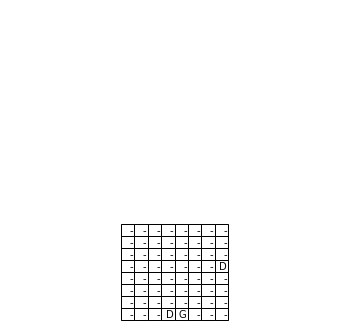

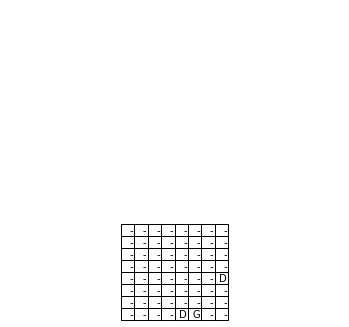

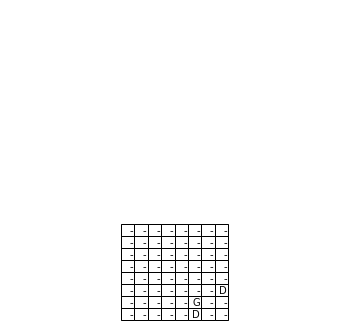

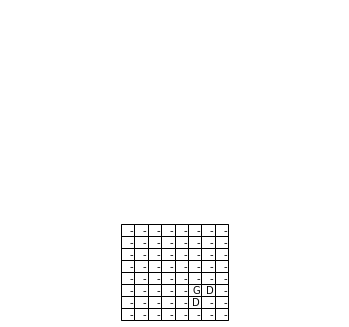

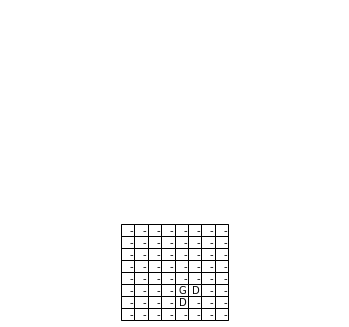

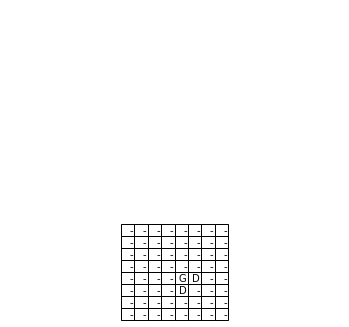

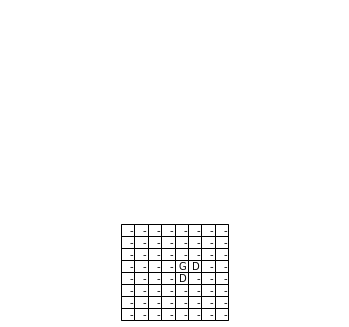

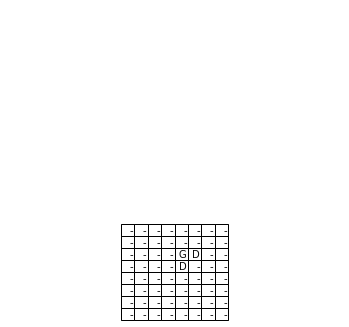

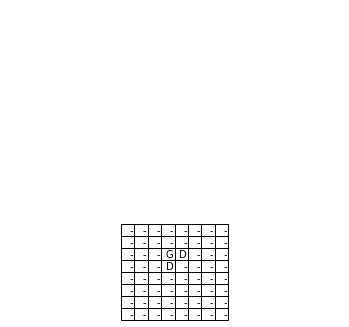

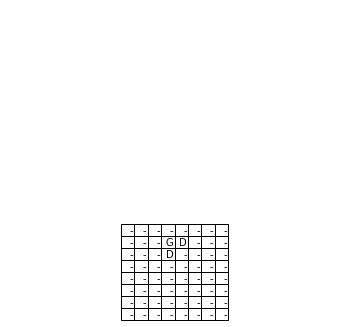

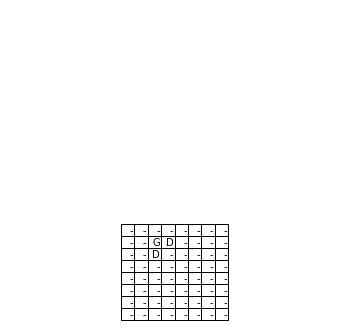

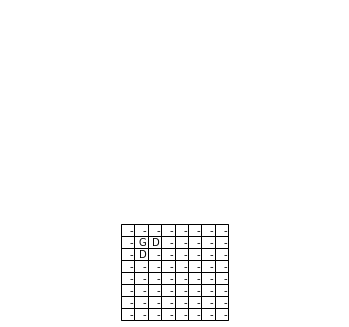

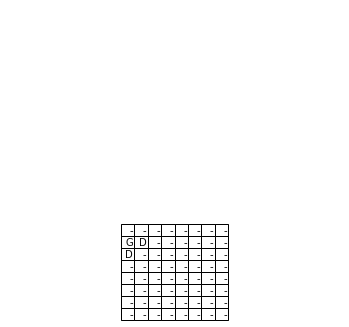

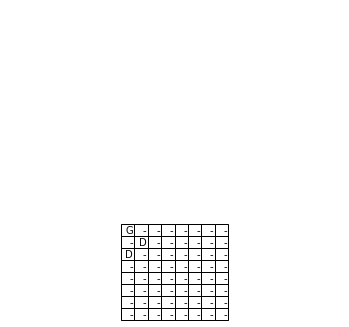

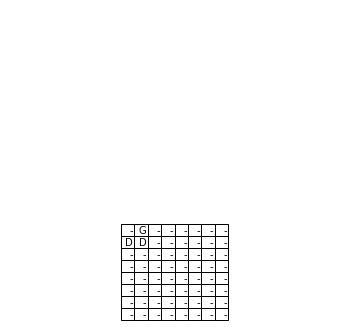

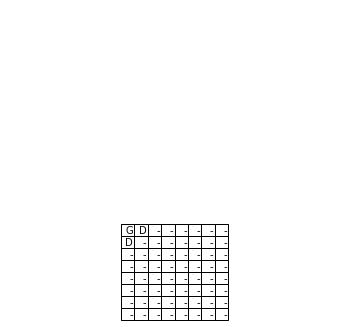

In [0]:
a=Map()
for i in range(100):
  a.move_dog1(1)
  a.move_dog2(1)
  a.print_map()
  if not a.move_goat():
    break
